# Adding white noise to sine waves (2015.10.09 KT DW)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
%matplotlib inline

In [4]:
def medianFilter( data, windowLength ): 
    if (windowLength < len(data)and data.ndim == 1):
        tempret = np.zeros(len(data)-windowLength+1)
        if windowLength % 2 ==0:
            for c in range(0, len(tempret)):
                tempret[c] = np.median( data[ c : c + windowLength +1 ] )
            return tempret
        else:
            for c in range(0, len(tempret)):
                tempret[c] = np.median( data[ c : c + windowLength ] )
            return tempret
    else:
         raise ValueError("windowLength must be smaller than len(data) and data must be a 1D array")

In [5]:
def ErrorRate(signal, datafiltered, windowLength):
    #calculate the difference between the sine wave and the filtered wave
    errorrate = signal-datafiltered
    #creating a list and save the error rate (y) and window length (x) in it
    error = []
    errorrate = np.abs(errorrate)
    error.append([windowLength ,np.mean(errorrate)])
    #zip the error list
    error = zip(*error)
    return error

In [14]:
def Errorplot( waveNumber, windowLength ):
    data = np.fromfunction( lambda x: np.sin((x-windowLength / 2)/128 * 2 * np.pi * waveNumber), (128 + windowLength / 2, ) )
    noise = np.random.normal(0,0.2,(128 + windowLength / 2))
    signal = data + noise
    datafiltered = medianFilter(signal, windowLength)
    signal = signal[ windowLength / 2 : - windowLength ]
    datafiltered = datafiltered[ : len(signal) ]
    error = ErrorRate(signal,datafiltered,windowLength)
    plt.axis([0, y + 1, 0, 1])
    plt.xlabel('Window length', fontsize = 20)
    plt.ylabel('Error rate', fontsize = 20)
    plt.scatter(*error)

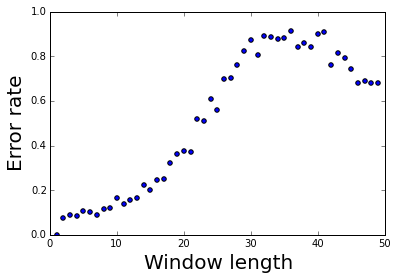

In [16]:
for y in range (0,50):
    Errorplot(5,y)